1. Are those with children more likely to feel stress than adults without dependences?
2. How does the number of dependencies and their age group affect stress levels in parents/head of household (HoH)?
3. Do stress levels differ between male and female population?
4. Do stress levels differ between male and female parents?


PHQ4_1-4 - Patient health questionnaire, response scale of 1-4 for frequency
1. Little interest or pleasure in doing things
2. Feeling down, depressed, or hopeless
3. Feeling nervous, anxious, or on edge
4. Not being able to stop or control worrying

child_age_1-5 - Number of children within the 5 age groups
1. 0-2
2. 3-11
3. 12-18
4. 19+
5. N/A


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.set_style("darkgrid")

In [2]:
ucl_data = pd.read_csv('cov19tracker_cleaned.csv')

/usr/local/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (1,2,3,4,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
ucl_data.head()

,index_n,state,year-month,endtime,gender,age,household_size,household_children,child_age_1,child_age_2,...,w4_2,w4_3,w4_4,w4_5,w4_6,w4_7,w4_8,w4_9,w4_10,w4_11
0,0,California,2020-02-01,02/04/2020 08:11,Female,33.0,5,2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Pennsylvania,2020-02-01,02/04/2020 08:12,Male,38.0,4,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Florida,2020-02-01,02/04/2020 08:15,Female,48.0,2,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,California,2020-02-01,02/04/2020 08:15,Male,31.0,5,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Florida,2020-02-01,02/04/2020 08:15,Female,69.0,2,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [137]:
ucl_data.shape

(65860, 39)

In [138]:
ucl_data.replace(' ', np.nan, inplace=True)

In [155]:
stress_gender_df = pd.DataFrame(ucl_data[['PHQ4_1','gender']])
stress_gender_df.to_csv('phq4_1_gender.csv')

                 PHQ4_1 gender
65850        Not at all    NaN
65851        Not at all    NaN
65852        Not at all    NaN
65853  Nearly every day    NaN
65854               NaN    NaN
65855        Not at all    NaN
65856               NaN    NaN
65857               NaN    NaN
65858        Not at all    NaN
65859      Several days    NaN
  PHQ4_1  gender
0    NaN  Female
1    NaN    Male
2    NaN  Female
3    NaN    Male
4    NaN  Female
5    NaN    Male
6    NaN  Female
7    NaN    Male
8    NaN    Male
9    NaN  Female


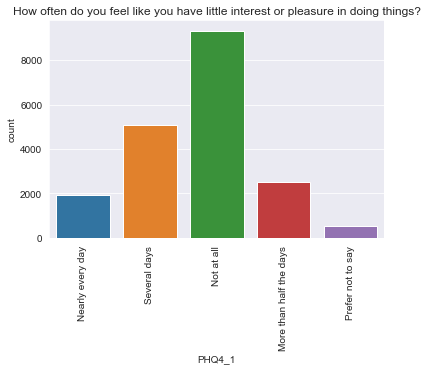

In [158]:
sns.countplot(x='PHQ4_1', data=ucl_data)
plt.title('How often do you feel like you have little interest or pleasure in doing things?')
plt.xticks(rotation=90);
plt.savefig('PHQ4_1_counts.png', bbox_inches = "tight")

In [7]:
ucl_data.PHQ4_1.value_counts()

                           13563
Not at all                  9322
Several days                5072
More than half the days     2502
Nearly every day            1949
Prefer not to say            522
Name: PHQ4_1, dtype: int64

<AxesSubplot:xlabel='gender', ylabel='count'>

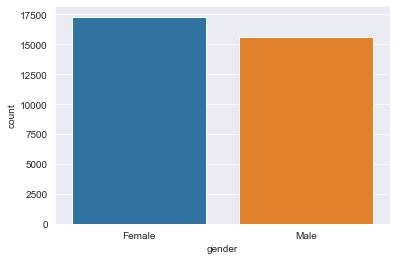

In [159]:
sns.countplot(x='gender', data=ucl_data)

In [8]:
ucl_data.gender.value_counts()

Female    17313
Male      15617
Name: gender, dtype: int64

In [9]:
us_df = pd.read_csv('united-states.csv')

/usr/local/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (4,6,42,81,90,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [12]:
pd.set_option("display.max.columns", None)
us_df.replace(' ', np.nan, inplace=True)
us_df.head()

,RecordNo,endtime,state,qweek,i1_health,i2_health,i7a_health,i3_health,i4_health,i5_health_1,i5_health_2,i5_health_3,i5_health_4,i5_health_5,i5_health_99,i5a_health,i6_health,i7b_health,i8_health,i9_health,i10_health,i11_health,i12_health_1,i12_health_2,i12_health_3,i12_health_4,i12_health_5,i12_health_6,i12_health_7,i12_health_8,i12_health_9,i12_health_10,i12_health_11,i12_health_12,i12_health_13,i12_health_14,i12_health_15,i12_health_16,i12_health_17,i12_health_18,i12_health_19,i12_health_20,i13_health,i14_health_1,i14_health_2,i14_health_3,i14_health_4,i14_health_5,i14_health_6,i14_health_7,i14_health_8,i14_health_9,i14_health_10,i14_health_96,i14_health_98,i14_health_99,i14_health_other,d1_health_1,d1_health_2,d1_health_3,d1_health_4,d1_health_5,d1_health_6,d1_health_7,d1_health_8,d1_health_9,d1_health_10,d1_health_11,d1_health_12,d1_health_13,d1_health_98,d1_health_99,weight,gender,age,household_size,household_children,employment_status,WCRex2,WCRV_4,CORE_B2_4,cantril_ladder,PHQ4_1,PHQ4_2,PHQ4_3,PHQ4_4,m1_1,m1_2,m1_3,m1_4,m2,m3,m4_1,m4_2,m4_3,m4_4,m4_96,m4_99,m4_other,m5_1,m5_2,m6_1,m6_2,m6_3,m6_4,m6_5,m6_6,m6_7,m6_8,m6_96,m6_other,m7_1,m7_2,m7_3,m7_4,m7_5,m7_6,m7_8,m7_9,m7_10,m7_11,m8_1,m8_2,m8_3,m8_4,m8_5,m8_6,m8_7,m8_8,m8_96,m8_99,m8_other,m9_1,m9_2,m9_3,m9_4,m9_5,m9_6,m9_7,m10,m11,m12_1,m12_2,m12_3,m12_4,m12_5,m12_6,m12_7,m12_8,m12_96,m12_99,m12_other,m13_1,m13_2,m13_3,m13_4,m13_5,m13_6,m13_8,m13_9,m13_10,m13_11,v1,v2_1,v2_2,v2_3,v2_4,v2_5,v2_99,v3,v3_open,v4_1,v4_2,v4_3,v4_4,v4_5,v4_96,v4_99,v3_other,WCRex1,i12_health_21,i12_health_22,i12_health_23,i12_health_24,i12_health_25,r1_1,r1_2,r1_3,r1_4,r1_5,r1_6,r1_7,m7_other,m14_1,m14_2,m14_3,m14_4,m14_5,m14_6,m14_7,m14_8,m14_9,m14_10,m14_11,m14_96,m14_99,m14_open,i14_health_11,ct1_1,ct1_2,ct1b_1,ct1b_2,ct1b_3,ct1b_4,ct1b_5,ct1b_6,ct1b_7,ct1b_8,ct1b_9,ct1b_10,ct1b_11,ct1b_96,ct1b_99,ct1b_other,ct2,ct3,ct3_other,ct4,ct5_1,ct5_2,ct5_3,ct5_4,ct5_5,ct5_6,ct5_7,ct5_8,ct5_96,ct5_99,ct5_other,ct6_1,ct6_2,ct6_3,ct6_4,ct6_5,ct6_6,ct6_96,ct6_99,ct6_other,ct7_1,ct7_2,ct7_3,ct8_1,ct8_2,ct8_3,ct8_4,ct8_5,ct8_6,ct8_99,i12_health_26,ox1_1,ox1_2,ox3_1,ox3_2,ox3_3,ox3_4,ox3_5,ox3_6,ox5_1,ox5_2,ox6,ox4_1_1,ox4_2_1,ox4_3_1,ox4_4_1,ox4_5_1,ox4_6_1,ox4_7_1,ox4_8_1,ox4_9_1,ox4_10_1,ox4_11_1,w1,w2,w3,w4_1,w4_2,w4_3,w4_4,w4_5,w4_6,w4_7,w4_8,w4_9,w4_10,w4_11,w4_99,w4b,w5_1,w5_2,w5_3,w5_4,w5_5,w5_6,w5_7,w5_8,w5_9,w5_10,w5_11,w5_12,w5_13,w5_14,w5_15,w5_16,w5_96,w5_99,w6,w7,w9_1,w9_2,w9_3,w9_4,w9_5,disability,inputstate,i12_health_27,i12_health_28,i12_health_29,r1_8,r1_9,r1_10,Soc1_1,Soc1_2,Soc1_3,Soc2_1,Soc2_2,Soc2_3,Soc2_4,Soc2_5,Soc2_6,Soc2_open,vac,vac_1,vac_3,vac2_1,vac2_2,vac2_3,vac2_6,vac2_7,vac3_1,vac3_2,vac3_3,vac3_4,vac3_5,vac3_6,vac3_7,vac3_8,vac3_9,vac3_other,vac5,vac7,vac8,av3,vac9,vac10_1,vac10_2,vac10_3,vac10_4,vac10_5,vac10_99,vac11,travel1_1,travel1_2,travel1_3,travel1_4,travel1_99,vac12_1,vac12_2,vac12_3,vac12_4,vac12_11,vac12_5,vac12_6,vac12_7,vac12_8,vac12_9,vac12_10,vac12_96,vac12_other,vac13,vac10_8,vac_booster,vac12_12,vac12_13,vac14_1,vac14_2,vac14_3,child_age_1,child_age_2,child_age_3,child_age_4,child_age_5,child_education_1,child_education_2,child_education_3,child_education_4,childvac,combi_vac
0,0,02/04/2020 08:11,California,week 1,5,7,0,"No, I have not",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not sure,Neither easy nor difficult,Somewhat willing,Frequently,Always,Sometimes,Sometimes,Rarely,Sometimes,Rarely,Frequently,NaN,Always,Rarely,Not at all,Not at all,Rarely,Rarely,Frequently,Rarely,Sometimes,Sometimes,Rarely,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,__NA__,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,0.907068,Female,33,5,2,Not working,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [13]:
us_df.columns

Index(['RecordNo', 'endtime', 'state', 'qweek', 'i1_health', 'i2_health',
       'i7a_health', 'i3_health', 'i4_health', 'i5_health_1',
       ...
       'child_age_2', 'child_age_3', 'child_age_4', 'child_age_5',
       'child_education_1', 'child_education_2', 'child_education_3',
       'child_education_4', 'childvac', 'combi_vac'],
      dtype='object', length=407)